# Задание из четвёртой лабы

Обучите один из алгоритмов классификации из библиотеки sklearn. Объяснять принцип работы классификатора в этой лабораторной не требуется

1. Выберите один из датасетов первой лабораторной


2. Найдите в данных признак, который будете предсказывать
    
    Если это категория, то у неё должно быть от 2 до 10 значений (например колонка species в датасете миграции птиц содержит 3 категории)
    
    Если признак количественный, то его нужно дискретизировать (например для популярности трека в датасете spotify можно разделить треки на 3 категории: 0-20 - популярные, 21-50 - обычные, 51 - 100 - непопулярные). Полученную категорию записать в датафрейм как отдельную колонку


3. Выделите признаки для предсказания
    
    Используйте от 2 до 5 количественных признаков для предсказания целевой переменной


4. Проверьте нормальность количественных признаков
    
    Используйте статистический тест из лекции. Если распределение является лог-нормальным, логарифмируйте его и проверьте на нормальность
    
    Как минимум 1 из признаков должен быть нормальным


5. Покажите качество предсказания модели с помощью метрик

    Метрика должна учитывать баланс классов в датасете

In [82]:
# Импорт базовых библиотек
import numpy as np
import pandas as pd

# Визуализация

# import seaborn as sns
import matplotlib.pyplot as plt

# Датасеты
from sklearn.datasets import load_iris  # для классификации
from sklearn.datasets import load_boston  # для регрессии

# Utils
from sklearn.model_selection import train_test_split, cross_val_score

# Модели (классификация)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Модели (регрессия)
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Метрики
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  # для классификации
from sklearn.metrics import mean_absolute_error, mean_squared_error  # для регрессии

# Misc
from sklearn.manifold import TSNE

from scipy import stats

%matplotlib inline

In [83]:
import pandas as pd

df = pd.read_csv('data/raw/SpotifyFeatures.csv')
df.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


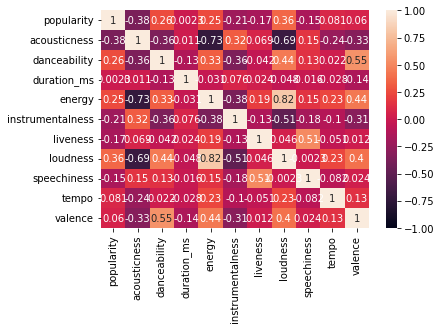

In [84]:
import seaborn as sns

sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True);

,artist_name,track_name,popularity,loudness,energy,danceability,status
0,Henri Salvador,C'est beau de faire un Show,0,-1.828,0.910,0.389,popular
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,-5.559,0.737,0.590,popular
2,Joseph Williams,Don't Let Me Be Lonely Tonight,3,-13.879,0.131,0.663,popular
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,-12.178,0.326,0.240,popular
4,Fabien Nataf,Ouverture,4,-21.150,0.225,0.331,popular


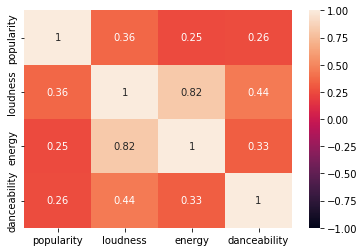

In [85]:
def to_status(num):
    if 0 <= num and num <= 20:
        return 'popular'
    if 21 <= num and num <= 50:
        return 'normal'
    return 'unpopular'

df['status'] = df['popularity'].apply(to_status)
df2 = df[['artist_name', 'track_name', 
          'popularity', 'loudness', 
          'energy', 'danceability', 'status']]

sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True);
df2.head(5)

In [101]:
#df['danceabilityLog'] = np.log(df['danceability'])
#df['energyLog'] = np.log(df['energy'])

#print(stats.normaltest(df['danceabilityLog'][1016:1200]))
#print(stats.normaltest(df['energyLog'][1016:1200]))

start, end = 72100, 72250
first = df['loudness'][start:end]
second = df['danceability'][start:end]
third = df['energy'][start:end]
#for i in range(1100, 110000, 1000):
#    if (stats.normaltest(df['loudness'][i:i+150])[1] > 0.05 and stats.normaltest(df['danceability'][i:i+150])[1] > 0.05):
#        print(i)

print('loudness:', stats.normaltest(first))
print('danceability:', stats.normaltest(second))
print('energy:', stats.normaltest(third))

loudness: NormaltestResult(statistic=5.63268823654867, pvalue=0.05982425380224576)
danceability: NormaltestResult(statistic=2.906081531762774, pvalue=0.23385809811522648)
energy: NormaltestResult(statistic=20.220959830976447, pvalue=4.065129295406474e-05)


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = np.column_stack((first, second, third))
y = df['status'][start:end]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, test_size=0.2)

# Так как у нас только 150 объектов в общей выборке и исходные данные имеют природу отличную от текстов,
# то имеет смысл обучить такие алгоритмы, как:
# 1) KNeighborsClassifier;
# 2) SVC;
# 3) RandomForestClassifier (один из представителей ансамблевых методов).

# Инициализируем алгоритмы с параметрами по-умолчанию
knn_clf = KNeighborsClassifier()
svm_clf = SVC()
forest_clf = RandomForestClassifier()

# Обучим классификаторы на тренировочных данных
for clf in [knn_clf, svm_clf, forest_clf]:
    clf.fit(X_train, y_train)

# Получим значение метки для тестового набора
knn_pred = knn_clf.predict(X_test)
svm_pred = svm_clf.predict(X_test)
forest_pred = forest_clf.predict(X_test)

# Посчитаем метрику качества
knn_acc_score = accuracy_score(y_test, knn_pred)
svm_acc_score = accuracy_score(y_test, svm_pred)
forest_acc_score = accuracy_score(y_test, forest_pred)

# Выведем алгоритмы по убыванию качества их работы
leaderboard = sorted([
    ('KNN', knn_acc_score),
    ('SVC', svm_acc_score),
    ('Forest', forest_acc_score)
], key=lambda pair: pair[1], reverse=True)

print('Leaderboard:')
for idx, (leader_name, leader_score) in enumerate(leaderboard):
    print(f'{idx + 1}. {leader_name}: {leader_score}')

Leaderboard:
1. KNN: 0.8666666666666667
2. SVC: 0.8666666666666667
3. Forest: 0.7666666666666667


In [106]:
from sklearn.metrics import f1_score

print(np.unique(df['status'], return_counts=True))

print(f1_score(y_test, knn_pred, average='weighted'))
print(f1_score(y_test, svm_pred, average='weighted'))
print(f1_score(y_test, forest_pred, average='weighted'))

(array(['normal', 'popular', 'unpopular'], dtype=object), array([120683,  32440,  79602], dtype=int64))
0.8047619047619048
0.8047619047619048
0.7522012578616353
